# 순환 신경망(Recurrent Neural Network, RNN)

- 루프(loop)를 가진 신경망의 한 종류

- 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 상태(state)에 저장

# 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [1]:
import numpy as np

In [3]:
timesteps = 100
input_features = 32
output_features = 64

In [5]:
inputs = np.random.random(( timesteps, input_features ))
inputs

array([[0.74293198, 0.89051253, 0.88071077, ..., 0.63628099, 0.2345555 ,
        0.68590334],
       [0.88733852, 0.72533524, 0.12158359, ..., 0.66956901, 0.43260068,
        0.22486514],
       [0.27789952, 0.98459409, 0.49414259, ..., 0.59126809, 0.73361539,
        0.90120386],
       ...,
       [0.59266112, 0.38182442, 0.99776651, ..., 0.45056043, 0.68458377,
        0.98800049],
       [0.86259565, 0.31021468, 0.39231878, ..., 0.60931825, 0.73707778,
        0.47444713],
       [0.56392544, 0.91064636, 0.32952856, ..., 0.7762467 , 0.89322657,
        0.47963415]])

In [6]:
state_t = np.zeros((output_features))
state_t

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
W = np.random.random(( output_features, input_features ))  # ((64, 32))
U = np.random.random(( output_features, output_features ))  # ((64, 64))
b = np.random.random(( output_features ))                  # ((64))

In [15]:
W

array([[0.6717746 , 0.76237034, 0.23431894, ..., 0.15309762, 0.21663801,
        0.36851073],
       [0.61535137, 0.62917926, 0.43846841, ..., 0.228551  , 0.35891874,
        0.22630509],
       [0.94377928, 0.18098419, 0.63040171, ..., 0.25073393, 0.93168185,
        0.1600601 ],
       ...,
       [0.02306502, 0.44217828, 0.54703434, ..., 0.66947105, 0.00213207,
        0.42502775],
       [0.32525453, 0.35837605, 0.75440484, ..., 0.2750624 , 0.41450249,
        0.93642315],
       [0.59280106, 0.07528145, 0.37169689, ..., 0.33305123, 0.59939611,
        0.74546983]])

In [16]:
U

array([[0.53340804, 0.51560645, 0.85103961, ..., 0.64167404, 0.77277311,
        0.79289184],
       [0.86648455, 0.55796881, 0.13998155, ..., 0.10688434, 0.51159768,
        0.23942399],
       [0.38904012, 0.50094329, 0.87764395, ..., 0.44975809, 0.61235875,
        0.47233731],
       ...,
       [0.65279145, 0.14742269, 0.78709521, ..., 0.61629127, 0.49589473,
        0.17334359],
       [0.17555272, 0.07914534, 0.65902818, ..., 0.66967586, 0.966164  ,
        0.33523058],
       [0.61435559, 0.73389971, 0.00508172, ..., 0.10468441, 0.35877906,
        0.84947022]])

In [17]:
b

array([0.20747174, 0.3897888 , 0.49025045, 0.57808004, 0.09823906,
       0.51844171, 0.07900876, 0.58546603, 0.43683165, 0.29455187,
       0.42771412, 0.70540475, 0.84509156, 0.3924449 , 0.43871926,
       0.21199659, 0.61417857, 0.45461491, 0.57375688, 0.84113257,
       0.1725485 , 0.70187336, 0.94129064, 0.53209516, 0.17891354,
       0.1731091 , 0.49536714, 0.27016922, 0.2016062 , 0.40268972,
       0.96227231, 0.36365831, 0.06844283, 0.22261637, 0.87087936,
       0.59331201, 0.00424359, 0.36557275, 0.30795749, 0.21204672,
       0.25959602, 0.39215696, 0.0096616 , 0.45906628, 0.95368887,
       0.64565064, 0.63977679, 0.89790968, 0.87811865, 0.54363516,
       0.45651138, 0.8755435 , 0.70249904, 0.77975864, 0.83751272,
       0.38405098, 0.02604768, 0.38843506, 0.59033698, 0.85029494,
       0.78491458, 0.85060213, 0.899114  , 0.16978611])

In [9]:
sucessive_outputs = []

In [11]:
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    sucessive_outputs.append(output_t)
    state_t = output_t
    
final_output_sequence = np.stack(sucessive_outputs, axis = 0)

In [14]:
type(sucessive_outputs)
sucessive_outputs

[array([0.99999987, 0.99999515, 0.99999965, 0.99999998, 0.99999449,
        0.99999945, 0.99999947, 0.99999649, 0.99999609, 0.99999994,
        0.99999998, 0.99999964, 0.9999995 , 0.99999983, 0.9999999 ,
        0.99999885, 0.99999999, 0.99999967, 0.99999924, 0.99999996,
        0.99999937, 0.9999995 , 0.99999921, 0.99999983, 0.99998346,
        0.9999816 , 0.99999956, 0.99999886, 0.99999992, 0.9999998 ,
        0.99999948, 0.99999933, 0.99999993, 0.99999062, 0.99999909,
        0.99999987, 0.99999774, 0.99999972, 0.99999985, 0.99999822,
        0.99999997, 0.99999654, 0.99999961, 0.99999784, 0.99999967,
        0.99999987, 0.99999941, 0.99999992, 0.99999888, 0.99999487,
        0.99999971, 0.99999988, 0.99999968, 0.99999997, 0.99999992,
        0.99999986, 0.99999768, 0.99999987, 0.99999968, 0.99999916,
        0.99999992, 0.99999878, 0.99999984, 0.99999909]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [13]:
final_output_sequence

array([[0.99999987, 0.99999515, 0.99999965, ..., 0.99999878, 0.99999984,
        0.99999909],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [31]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [20]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [21]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [37]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [24]:
num_words = 10000
max_len = 500
batch_size = 32

In [25]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words )

In [27]:
print(len(x_train))
print(len(y_test))

25000
25000


In [28]:
pad_x_train = sequence.pad_sequences(x_train, maxlen=max_len)
pad_x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [29]:
print(pad_x_train.shape)
print(pad_x_test.shape)

(25000, 500)
(25000, 500)


In [32]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add( Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['accuracy'] )
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


# 모델학습

In [36]:
history = model.fit(pad_x_train, y_train,
                    epochs=10, 
                    batch_size=128,
                    validation_split=0.2 )

Epoch 1/10
157/157 [==============================] - 125s 780ms/step - loss: 0.6661 - accuracy: 0.5863 - val_loss: 0.6025 - val_accuracy: 0.6652
Epoch 2/10
157/157 [==============================] - 123s 786ms/step - loss: 0.4192 - accuracy: 0.8223 - val_loss: 0.4127 - val_accuracy: 0.8192
Epoch 3/10
157/157 [==============================] - 123s 782ms/step - loss: 0.2986 - accuracy: 0.8809 - val_loss: 0.3572 - val_accuracy: 0.8624
Epoch 4/10
157/157 [==============================] - 125s 793ms/step - loss: 0.2080 - accuracy: 0.9223 - val_loss: 0.4383 - val_accuracy: 0.8072
Epoch 5/10
157/157 [==============================] - 124s 790ms/step - loss: 0.1393 - accuracy: 0.9506 - val_loss: 0.4158 - val_accuracy: 0.8422
Epoch 6/10
157/157 [==============================] - 125s 798ms/step - loss: 0.0850 - accuracy: 0.9725 - val_loss: 0.4950 - val_accuracy: 0.8166
Epoch 7/10
157/157 [==============================] - 121s 771ms/step - loss: 0.0580 - accuracy: 0.9817 - val_loss: 0.5682 -

# 시각화

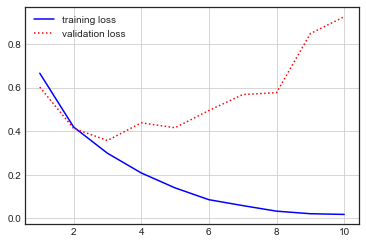

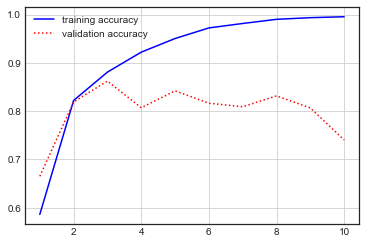

In [38]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

acc   = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss  = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b-', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b-', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

# 검증

model.evaluate(pad_x_test, y_test)

* 전체 시퀀스 아니라 순서대러 500개 단어만 입력했기 성능이 낮게 나옴
* SimpleRNN은 긴 시퀀스르 처리하느데 적합하지 않음